## 1. Data import and initial exploration

Dataset import 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statistics import mode

In [124]:
df=pd.read_csv('COVID19_data.csv', index_col=0)
dictio=pd.read_csv('Dict.csv',delimiter=';')


Separate variables in categorical and numerical

In [125]:
cat_vars=[]
num_vars=[]

for i, row in dictio.iterrows():
    if dictio['Type'][i]=='Num':
        num_vars.append(dictio['Variable'][i])
    else:
        cat_vars.append(dictio['Variable'][i])

df_cat=df[cat_vars]
df_num=df[num_vars]

Print number of unique values per attribute

In [126]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

AGE : 62 values
SEX : 2 values
DAYS_HOSPITAL : 41 values
DAYS_ICU : 24 values
EXITUS : 2 values
DESTINATION : 1 values
TEMP : 54 values
HEART_RATE : 101 values
GLUCOSE : 20 values
SAT_O2 : 45 values
BLOOD_PRES_SYS : 131 values
BLOOD_PRES_DIAS : 82 values


Print number of missing values per attribute and plot the percentage

In [127]:
print("Number of missing values per attribute: \n", df.isnull().sum().sort_values(ascending=False))

Number of missing values per attribute: 
 DESTINATION        1383
EXITUS               41
AGE                   4
SEX                   2
DAYS_HOSPITAL         0
DAYS_ICU              0
TEMP                  0
HEART_RATE            0
GLUCOSE               0
SAT_O2                0
BLOOD_PRES_SYS        0
BLOOD_PRES_DIAS       0
dtype: int64


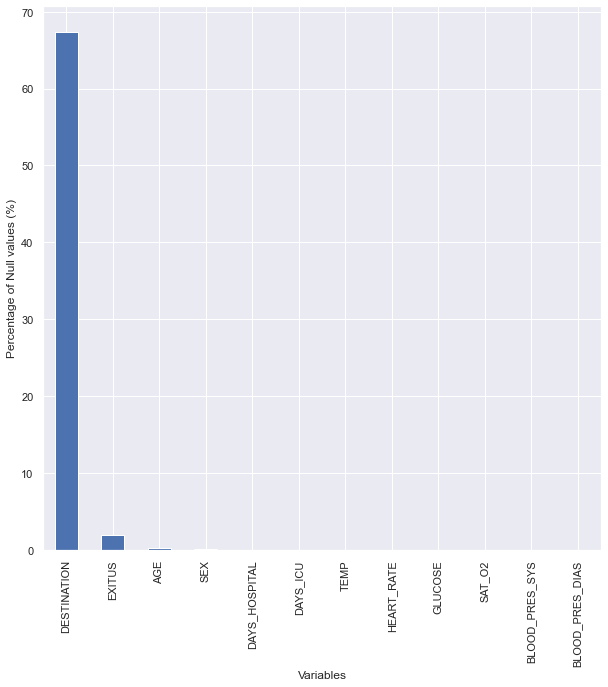

In [128]:
perc_missings = (df.isnull().sum()/df.shape[0])*100
perc_missings.sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
plt.xlabel('Variables')
plt.ylabel('Percentage of Null values (%)')
plt.show()

## 2. Quantitative variables analysis

Outliers

Text(0.5, 1.0, 'Box-plot')

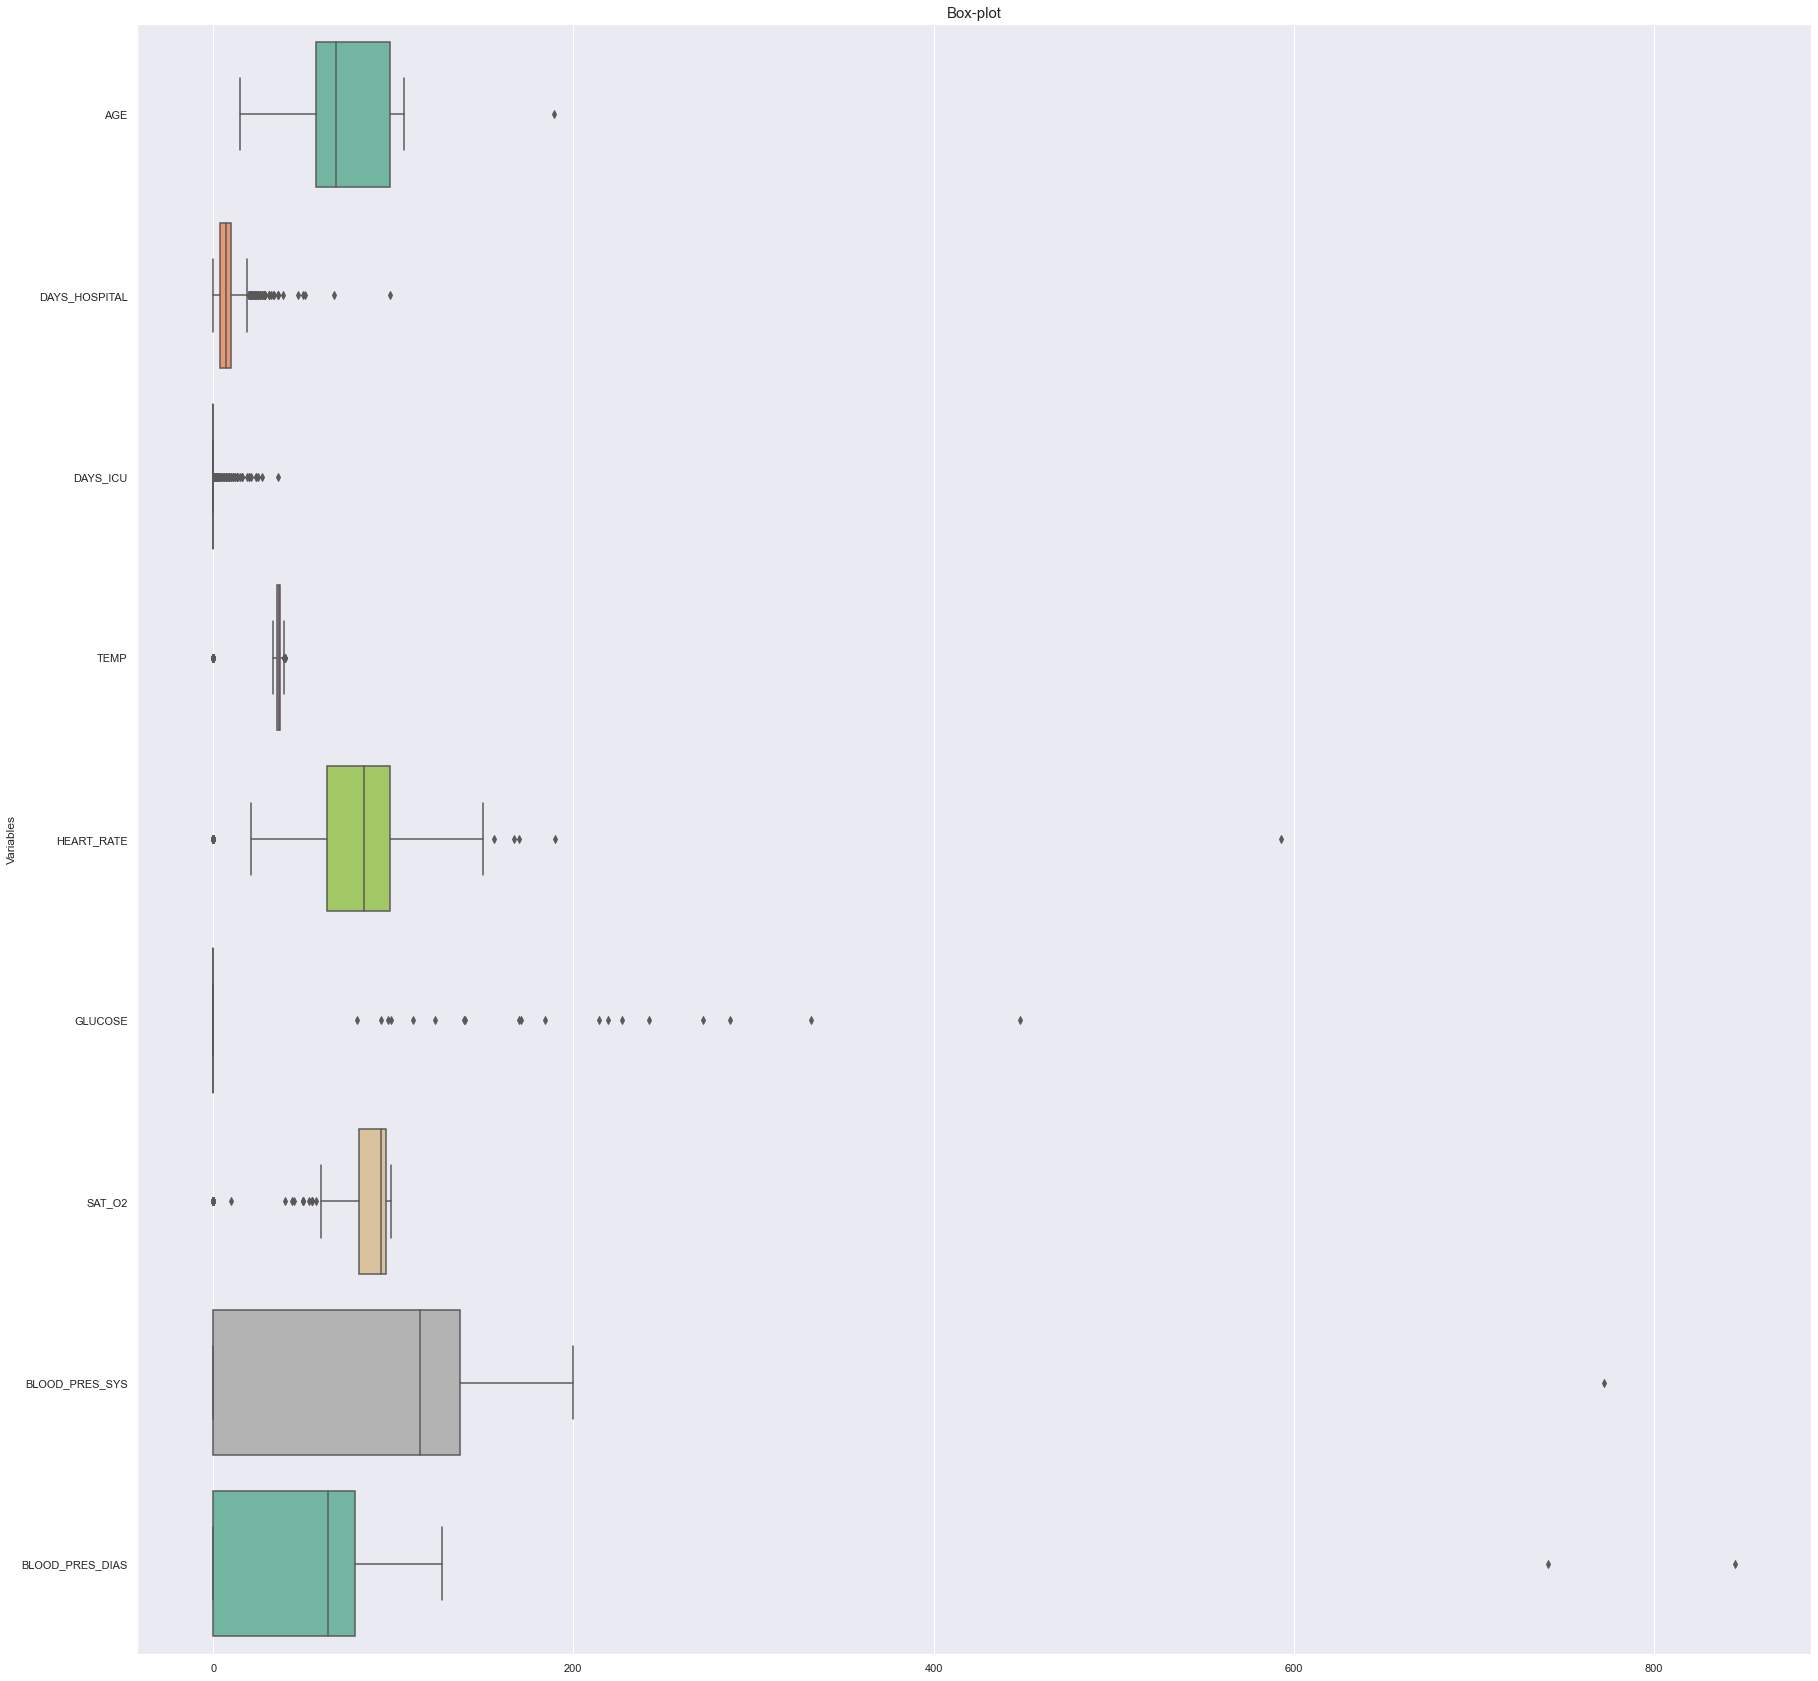

In [129]:
ax = sns.boxplot(data=df_num, orient="h", palette="Set2")
plt.ylabel("Variables", fontsize= 12)
plt.title("Box-plot", fontsize= 15)

Variable AGE has: 5 outliers
Variable DAYS_HOSPITAL has: 113 outliers
Variable DAYS_ICU has: 2054 outliers
Variable TEMP has: 473 outliers
Variable HEART_RATE has: 453 outliers
Variable GLUCOSE has: 2054 outliers
Variable SAT_O2 has: 435 outliers
Variable BLOOD_PRES_SYS has: 1 outliers
Variable BLOOD_PRES_DIAS has: 2 outliers


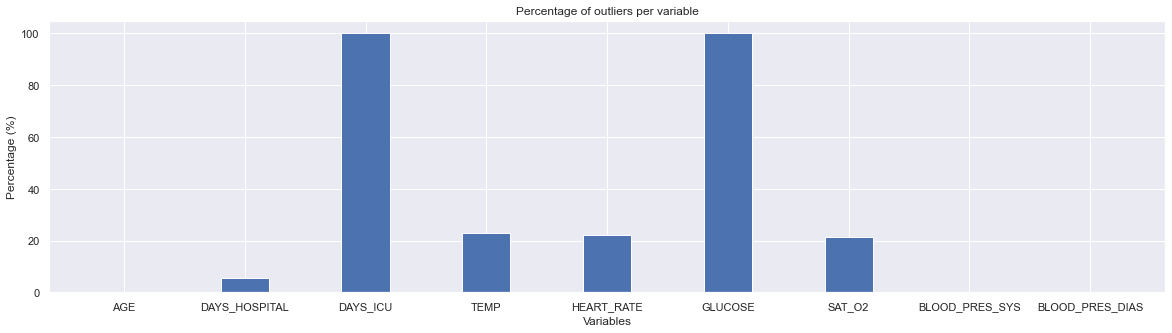

In [130]:
perc_outliers=[]

for i in df_num.columns:
    outlier_free_list=[]
    outliers=[]
    Q3 = np.nanquantile(df_num[i], 0.75)
    Q1 = np.nanquantile(df_num[i], 0.25)

    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    # Filter the data that are free of outliers

    for x in df_num[i]:
        if (x > lower_range) & (x < upper_range):
            outlier_free_list.append(x)
            
        else:
            outliers.append(x)
    
    print("Variable "+ str(i)+' has:', len(outliers), "outliers")
    perc_outliers.append((len(outliers)/len(df_num))*100)
    
fig = plt.figure(figsize = (20, 5))

plt.bar(df_num.columns, perc_outliers, width = 0.4)
plt.xlabel('Variables')
plt.ylabel('Percentage (%)')
plt.title('Percentage of outliers per variable')
plt.show()

Features statistics

In [152]:
means=[]
medians=[]
modes=[]
for i in df_num.columns:
    means.append(np.nanmean(df_num[i]))
    medians.append(np.nanmedian(df_num[i]))
    modes.append(statistics.mode(df_num[i]))
    



Features distribution

TypeError: list indices must be integers or slices, not str

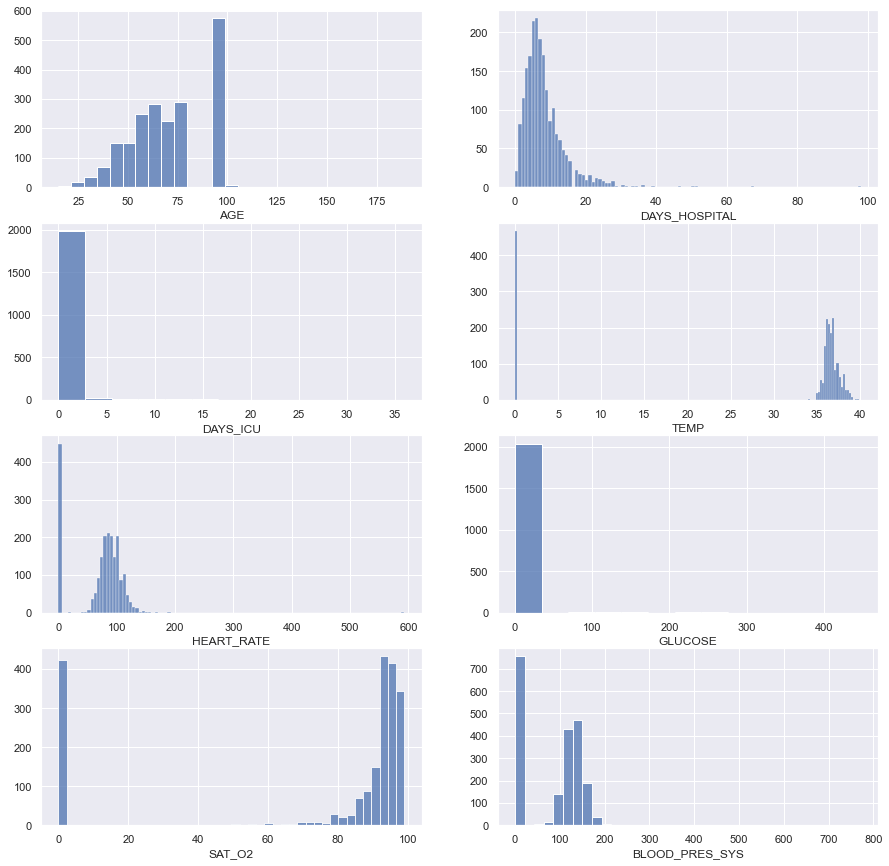

In [179]:
n_rows=round(len(num_vars)/2)

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15,15))

for ax, feat in zip(axes.flatten(), num_vars):
    sns.histplot(df_num, x=feat, ax=ax)
    ax.set(ylabel = '')
    